# <span style="color:royalblue"> [1주차] 같은 데이터를 다르게 바라보는 관점 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2024 서울 APT 전저점 및 전고점 대비 가격변화율 분석

--- 

<div style="text-align: right"> Final Edition : 2024.1.22<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

# 1. 국가통계포털 KOSIS 데이터 활용

## 아파트매매가격지수 → 전고점 대비 하락률, 전저점 대비 상승률 계산해보자

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from scipy.stats import linregress
import pandas as pd

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 파일 경로 설정 (파일 형식에 따라 수정 필요)
data_path = '아파트매매가격지수_시도_시_군_구__20240113001447.csv'  # CSV 파일 예시

# 데이터 로드
data = pd.read_csv(data_path, encoding='cp949')
data.head()

,행정구역,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,...,2023.06,2023.07,2023.08,2023.09,2023.1,2023.11,min,max,전고점 대비 가격하락률,전저점 대비 가격상승률
0,종로구,97.1,97.2,97.3,97.3,97.2,97.3,98.0,98.4,98.7,...,92.0,92.1,92.2,92.7,93.0,93.1,92.0,103.7,-10.221794,1.195652
1,중구,96.2,96.4,96.5,96.4,96.4,96.4,97.1,97.5,97.7,...,89.3,89.4,89.7,90.3,90.7,90.8,89.3,103.5,-12.270531,1.679731
2,용산구,95.8,95.9,96.0,96.0,95.8,95.9,96.6,97.1,97.4,...,97.0,97.3,98.0,98.7,99.2,99.6,95.8,105.9,-5.949008,3.966597
3,성동구,95.2,95.3,95.4,95.4,95.4,95.5,96.4,97.0,97.2,...,94.5,94.9,95.9,96.6,97.1,97.5,94.4,102.3,-4.692082,3.283898
4,광진구,95.4,95.4,95.4,95.3,95.2,95.4,96.2,96.6,97.0,...,91.8,92.1,92.5,93.0,93.5,93.7,91.8,102.0,-8.137255,2.069717


In [3]:
# !pip install adjustText

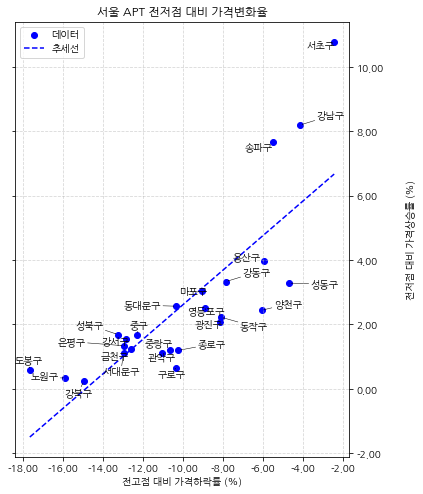

In [4]:
from adjustText import adjust_text  # adjust_text 라이브러리 추가
from matplotlib.ticker import StrMethodFormatter

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import linregress
from adjustText import adjust_text  # adjust_text 라이브러리 추가

# X와 Y에 해당하는 열 선택
x_column = '전고점 대비 가격하락률'  # x축에 해당하는 열 이름
y_column = '전저점 대비 가격상승률'  # y축에 해당하는 열 이름

# 그래프 생성
plt.figure(figsize=(6, 8))

# 산점도 그리기
plt.scatter(data[x_column], data[y_column], color='blue', label='데이터')

# X값과 Y값에 대한 선형 회귀
slope_x, intercept_x, _, _, _ = linregress(data[x_column], data[y_column])
x_trendline = np.linspace(data[x_column].min(), data[x_column].max(), 100)
y_trendline_x = slope_x * x_trendline + intercept_x
plt.plot(x_trendline, y_trendline_x, linestyle='--', color='blue', label='추세선')

# 그리드 추가 (점선, 희미한 효과)
plt.grid(True, linestyle='--', alpha=0.5)

# 축 라벨 설정
plt.xlabel(f'{x_column} (%)')
plt.ylabel(f'{y_column} (%)')

# Y축 눈금과 레이블을 표시
plt.tick_params(axis='y', labelright=True, labelleft=False, right=True)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

# Y축 제목을 오른쪽으로 강제로 옮기기
plt.gca().yaxis.set_label_coords(1.2, 0.5)

# X축 눈금과 레이블을 아래에 표시
plt.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

# 행정구역 이름 표시 (adjust_text 라이브러리 사용)
texts = [plt.text(data[x_column][i], data[y_column][i], label) for i, label in enumerate(data['행정구역'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', lw=0.5, color='black'), expand=(1.5, 1.5))

# 제목 추가
plt.title('서울 APT 전저점 대비 가격변화율')

# 범례 추가
plt.legend()


# 그래프 표시
plt.show()

# 2. 주요 매수자 연령층 분석

In [1]:
# 데이터 다운로드

[국가통계포털](https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_408_2006_S0077&vw_cd=MT_ZTITLE&list_id=408_31503_004&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

In [65]:
# 데이터 파일 경로 설정 (파일 형식에 따라 수정 필요)
data_path = '매입자연령대별_아파트매매거래현황_3040.csv'  # CSV 파일 예시

# 데이터 로드
data = pd.read_csv(data_path, encoding='cp949')
data.head()

,시점,수도권,지방,30대_수도권,30대_지방,40대_수도권,40대_지방,30대_수도권_비율,30대_지방_비율,40대_수도권_비율,40대_지방_비율
0,2019.01,12176,19129,3045,4567,3609,5573,0.250082,0.238747,0.296403,0.291338
1,2019.02,10187,18106,2603,4334,2858,5053,0.255522,0.239368,0.280554,0.279079
2,2019.03,11635,20125,2776,4614,3234,5658,0.238590,0.229267,0.277954,0.281143
3,2019.04,13500,22393,3199,4955,3755,6214,0.236963,0.221275,0.278148,0.277497
4,2019.05,14907,20803,3507,4621,4127,5729,0.235259,0.222131,0.276850,0.275393


In [66]:
data['연도']= data['시점'].astype(str).str.split('.', expand=True)[0]
data['월']= data['시점'].astype(str).str.split('.', expand=True)[1]

In [67]:
data['월'] = data['월'].replace("1", "10")
data['시점'] = data['연도'] + "-" + data['월']
data['시점'] = pd.to_datetime(data['시점'])

In [68]:
y1='30대_수도권_비율'
y2='40대_수도권_비율'
y3='30대_지방_비율'
y4='40대_수도권_비율'

In [69]:
max(data[y4])

0.308207972

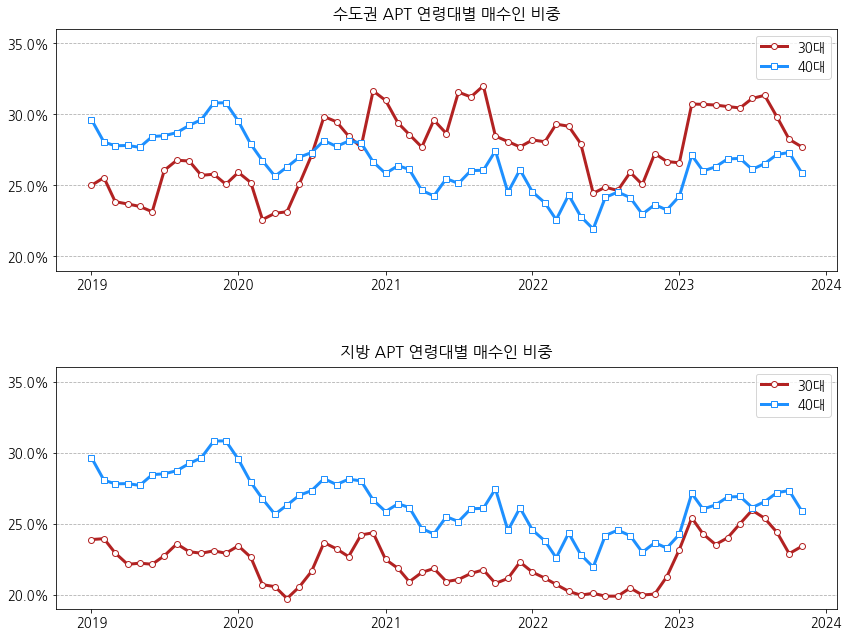

In [73]:
# 그래프 생성
plt.figure(figsize=(14, 10))

# 첫번째 subplot: 수도권 집합건물 연령대별 매수인 비중
plt.subplot(2, 1, 1)
plt.plot(data['시점'], data[y1]*100, lw= 3, marker='o', markersize=6, markerfacecolor='white', color='firebrick', label='30대')
plt.plot(data['시점'], data[y2]*100, lw= 3, marker='s', markersize=6, markerfacecolor='white', color='dodgerblue', label='40대')

plt.ylim(19.0, 36.0)  # Y축 한계 설정
plt.grid(axis='y', linestyle='--')  # y 축만 점선 그리드
# plt.xticks('2019-01-01', '2023-01-01', 2)#, rotation=45)  # 2개월 간격으로 x 축 눈금 설정
plt.yticks(np.arange(20, 36, 5))  # 5% 간격으로 y 축 눈금 설정
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}%'))

plt.title('수도권 APT 연령대별 매수인 비중', y=1.02, fontsize=16, ha='center')   # 제목 추가
plt.legend(loc='upper right')

# 강제로 위아래 그래프 간격 조절
plt.subplots_adjust(hspace=0.4, top=0.93)

# 두번째 subplot: 지방 집합건물 연령대별 매수인 비중
plt.subplot(2, 1, 2)
plt.plot(data['시점'], data[y3]*100, lw= 3, marker='o', markersize=6, markerfacecolor='white', color='firebrick', label='30대')
plt.plot(data['시점'], data[y4]*100, lw= 3, marker='s', markersize=6, markerfacecolor='white', color='dodgerblue', label='40대')

plt.ylim(19.0, 36.0)  # Y축 한계 설정
plt.grid(axis='y', linestyle='--')  # y 축만 점선 그리드
# plt.xticks(np.arange(0, len(time_data), 2))#, rotation=45)  # 2개월 간격으로 x 축 눈금 설정
plt.yticks(np.arange(20, 36, 5))  # 5% 간격으로 y 축 눈금 설정
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}%'))

plt.legend(loc='upper right')
plt.title('지방 APT 연령대별 매수인 비중', y=1.02, fontsize=16)  # 제목 추가

# 전체 그래프 제목
# plt.suptitle('연령대별 APT 매수인 거래비중', y=1.05, fontsize=20, x= 0.51)

# 그래프 표시
# plt.tight_layout()
plt.show()
